In [1]:
import xarray as xr
import matplotlib.pyplot as plt

import sys
sys.path.append("../../")

from config.config import Config

opt = Config(
    raw_ismn_global_path='../../data/raw/Data_separate_files_header_20000101_20201231_9562_Crun_20230723.zip', 
    raw_ismn_tibetan_path='../../data/raw/Data_separate_files_header_19500101_20230826_9562_asrG_20230826.zip', 
    era5_path='../../settings/data.nc'
)
tibetan_coords = opt.tibetan_coords

ds_mask = xr.open_dataset("../../data/raw/tibetan_mask.nc")
ds_mask_interp = ds_mask.interp(lon=tibetan_coords["lon"], lat=tibetan_coords["lat"])

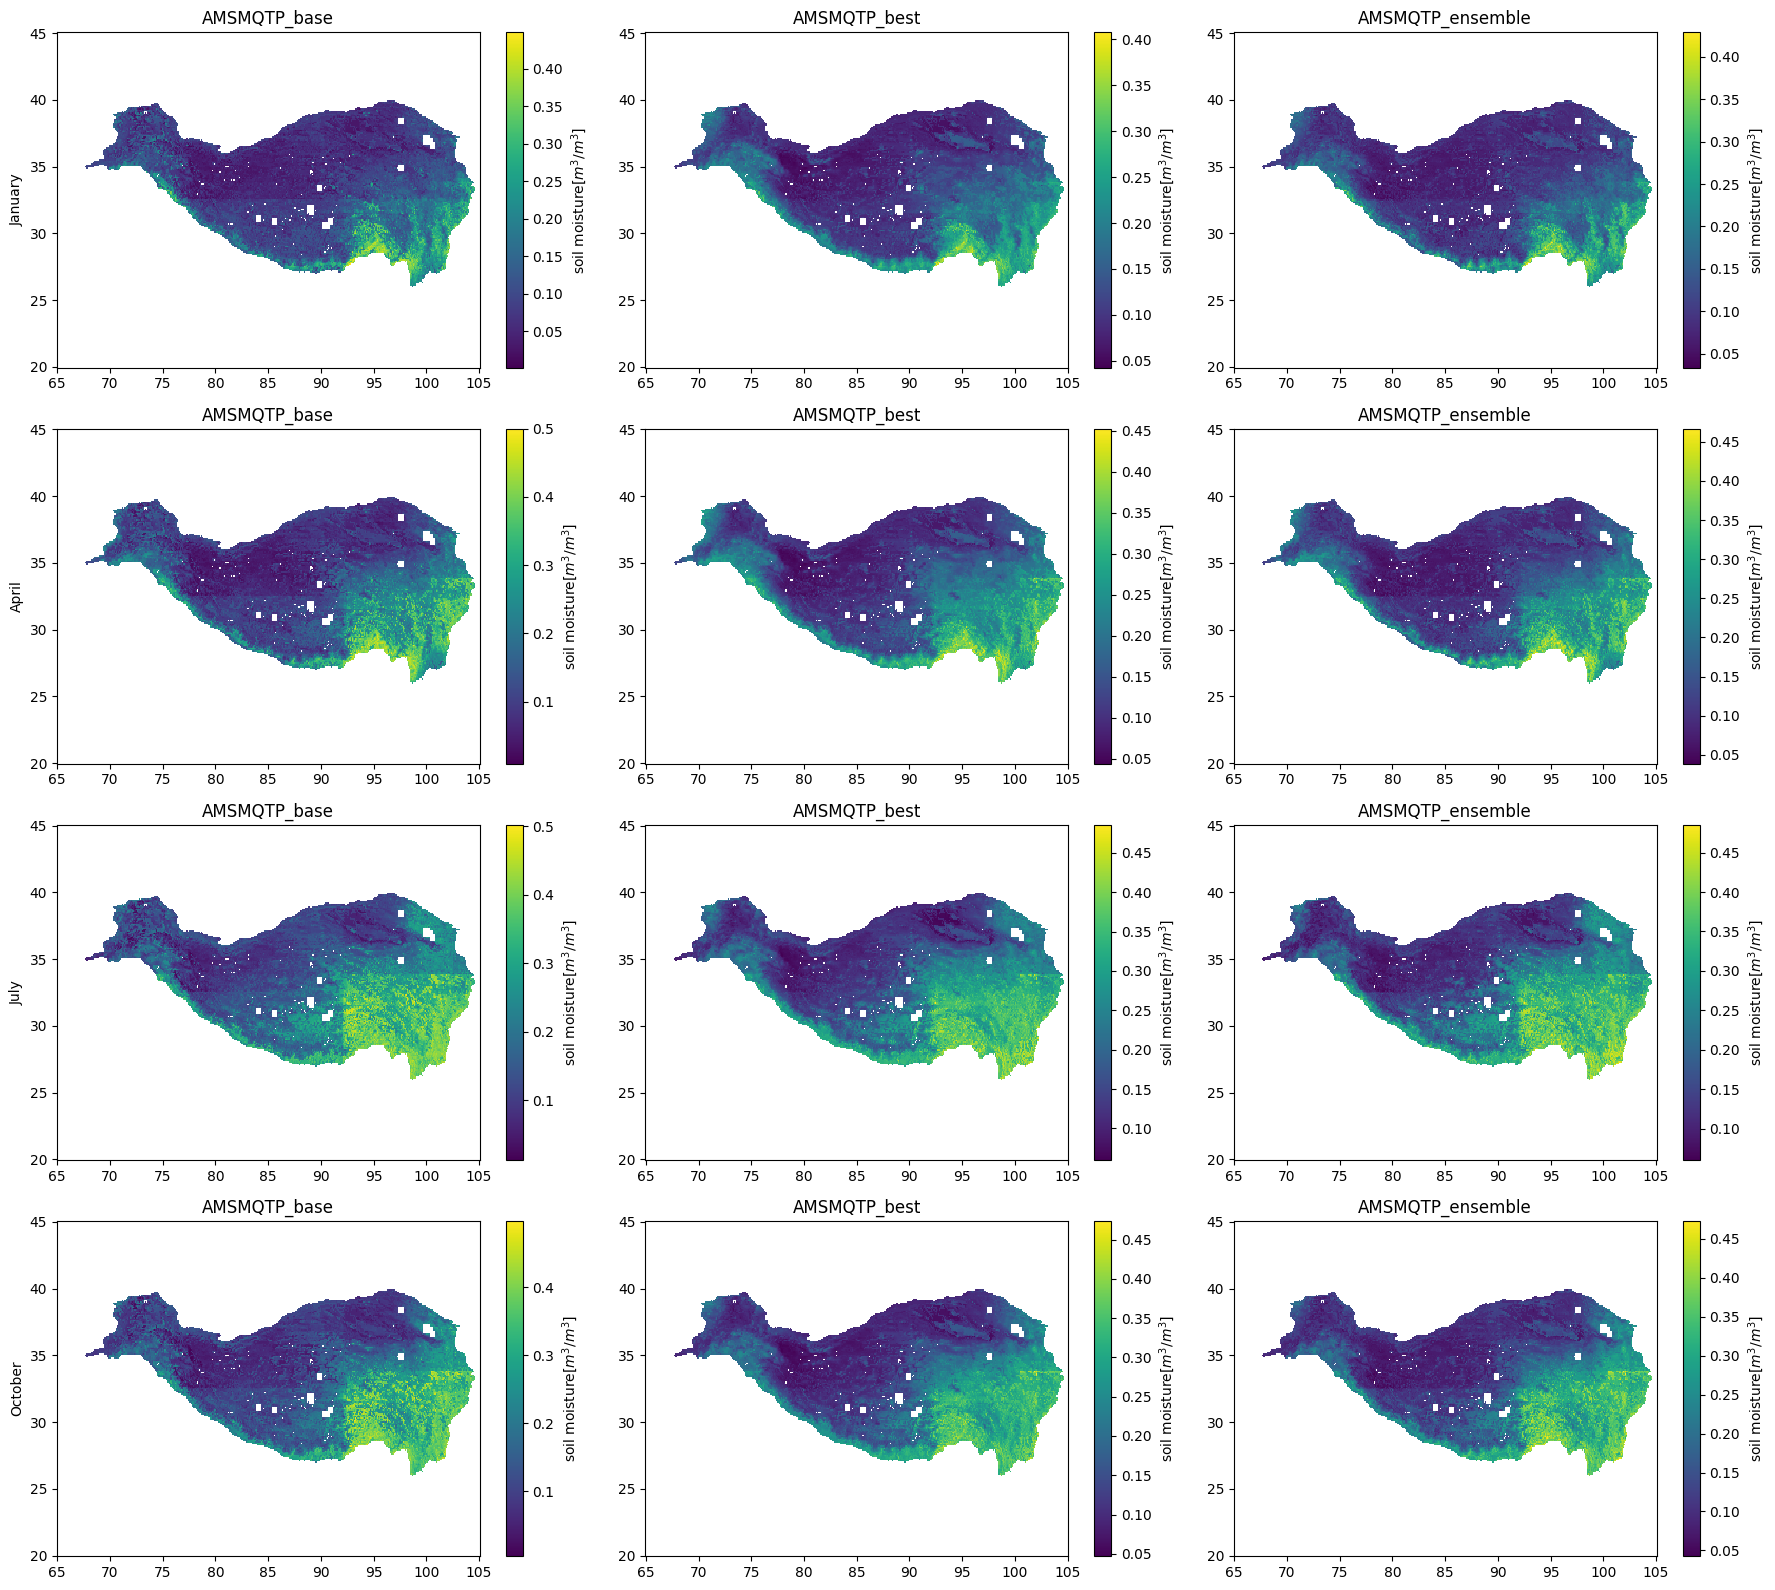

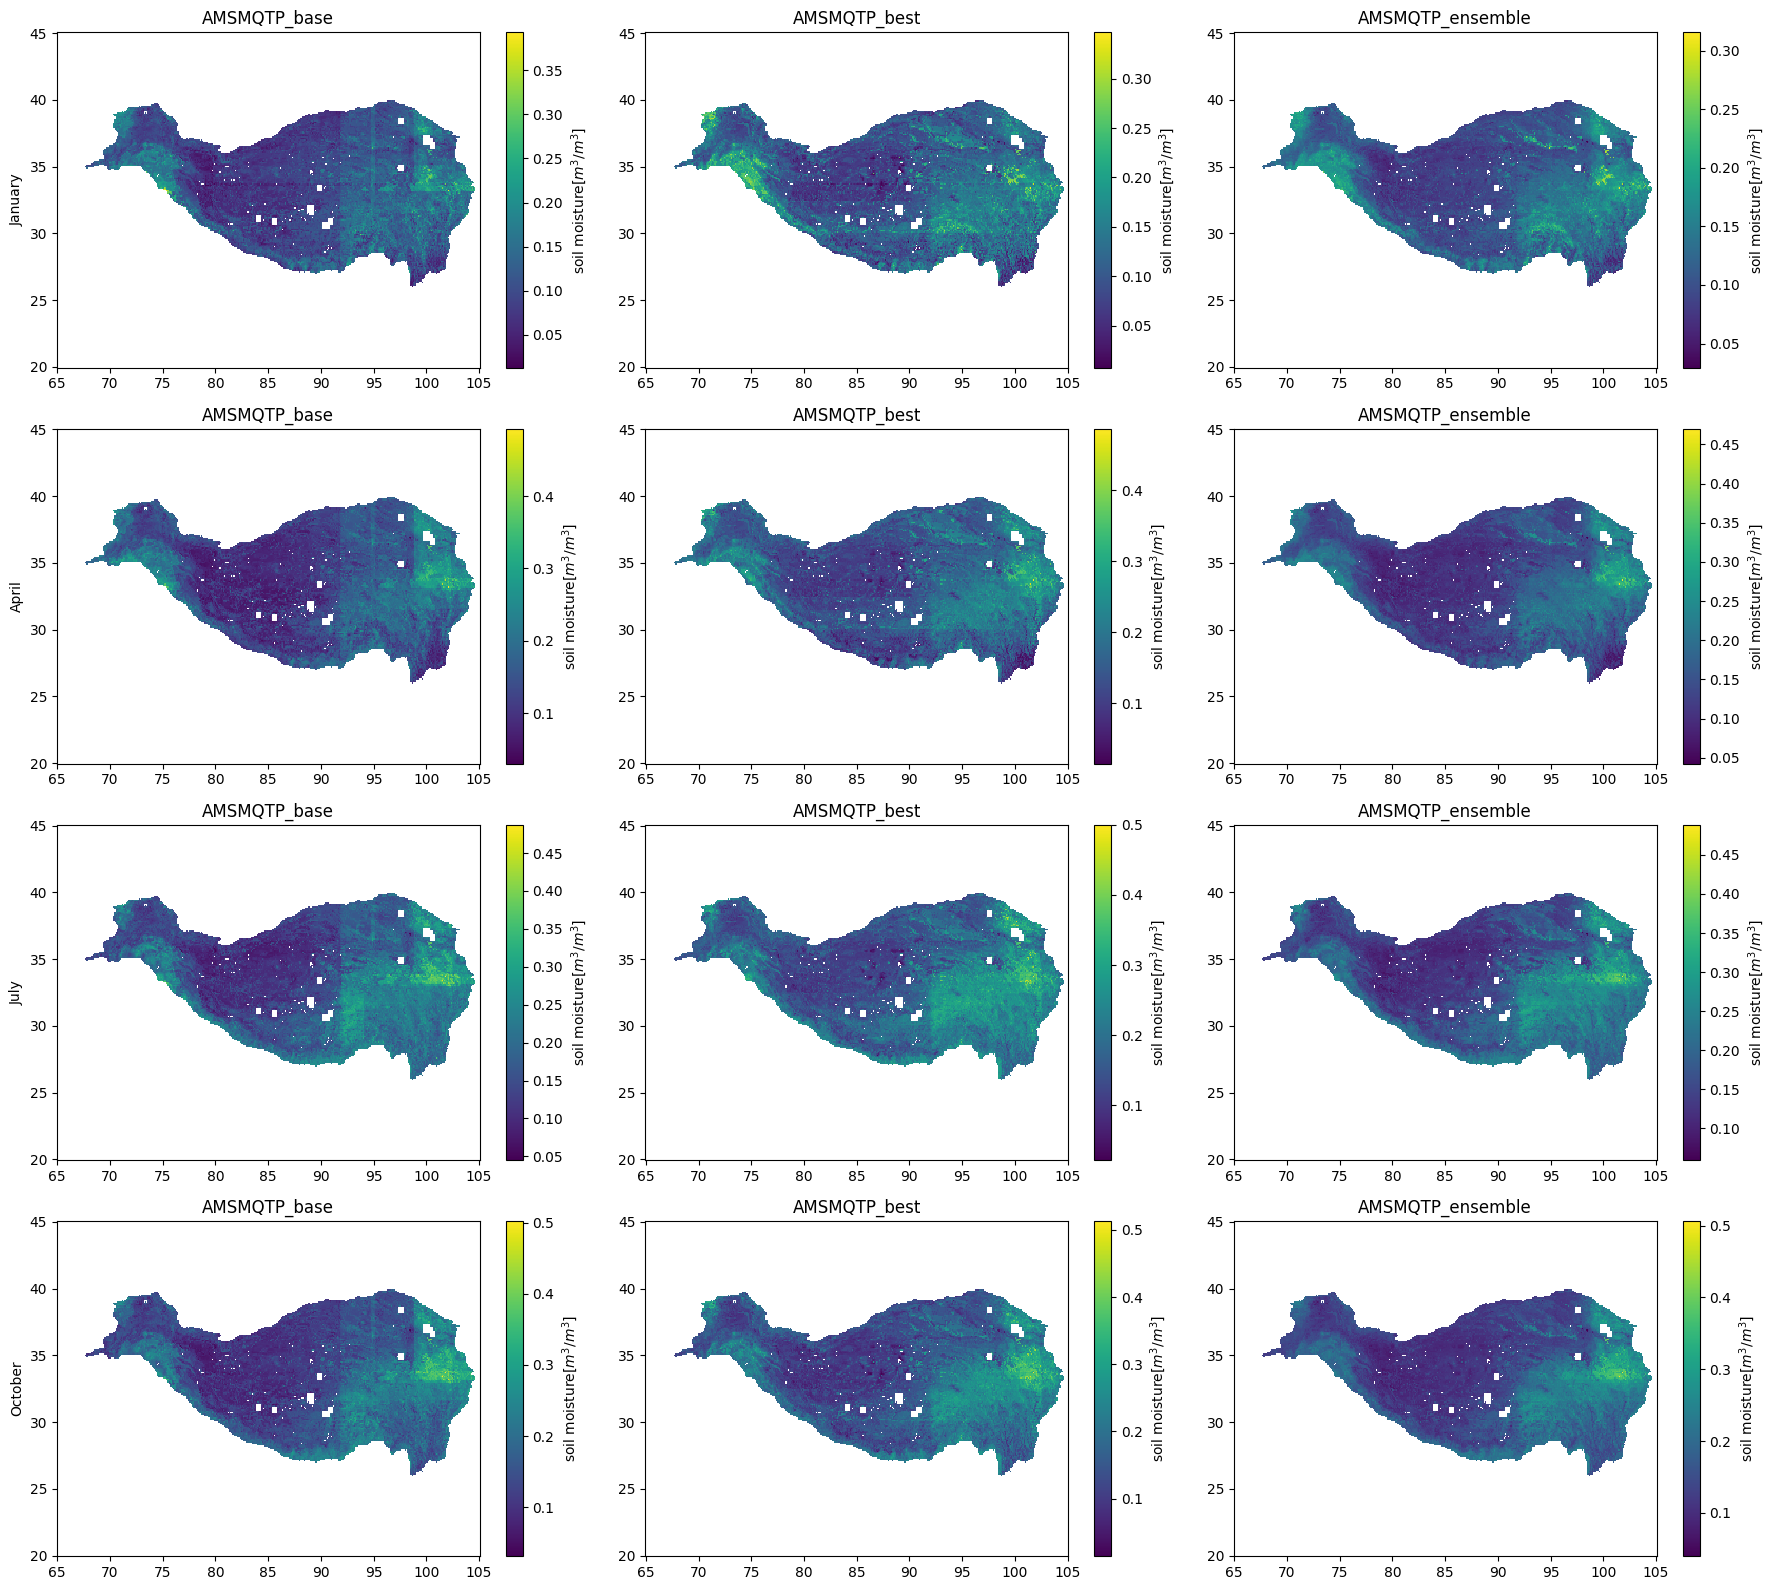

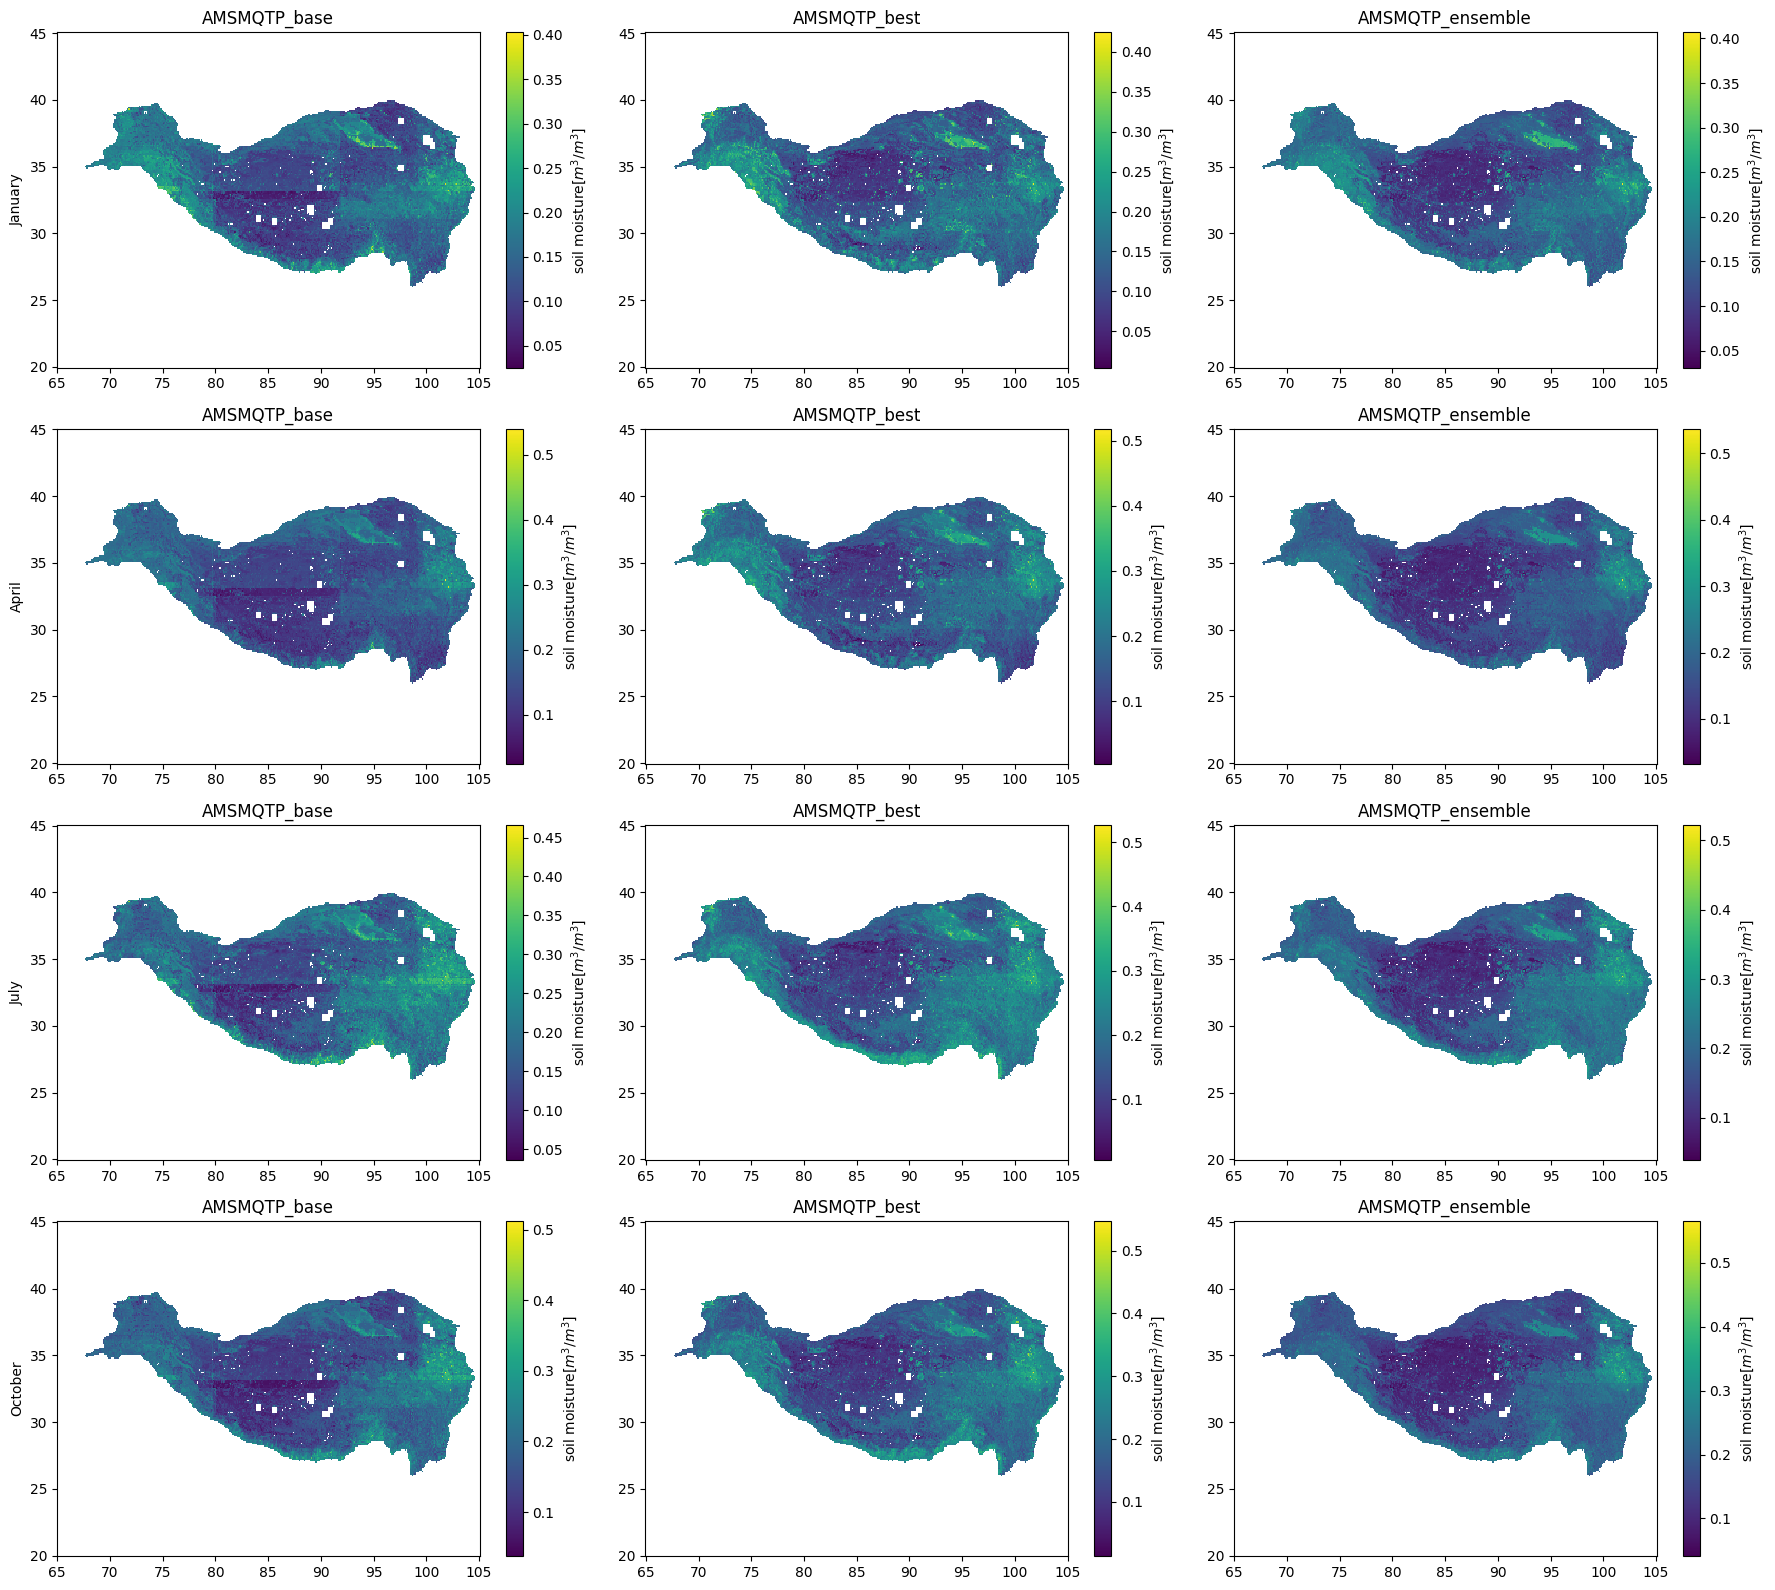

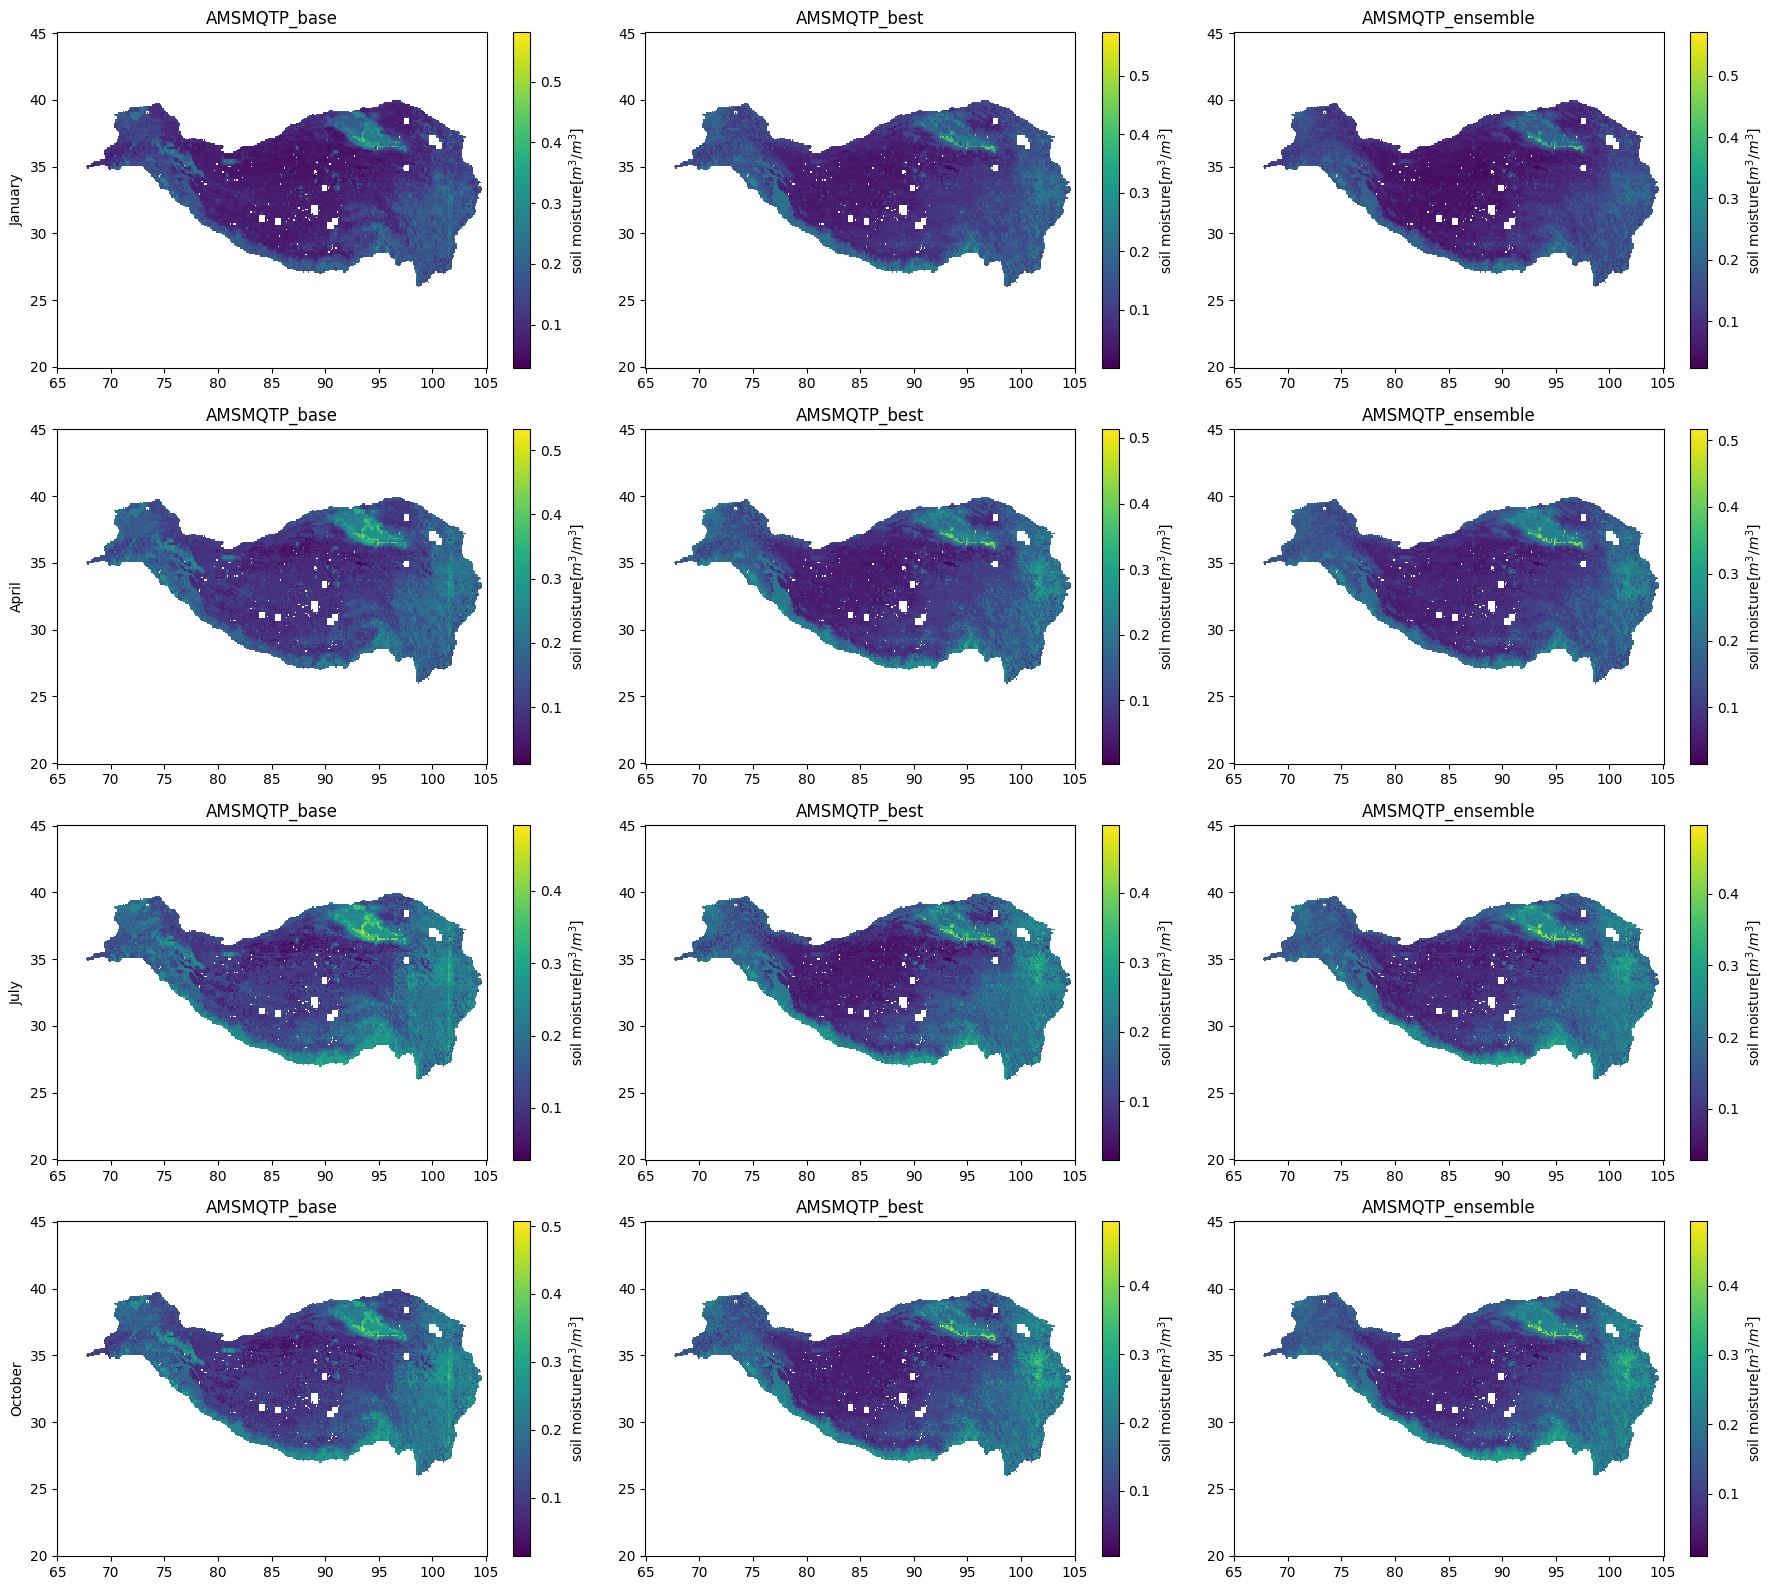

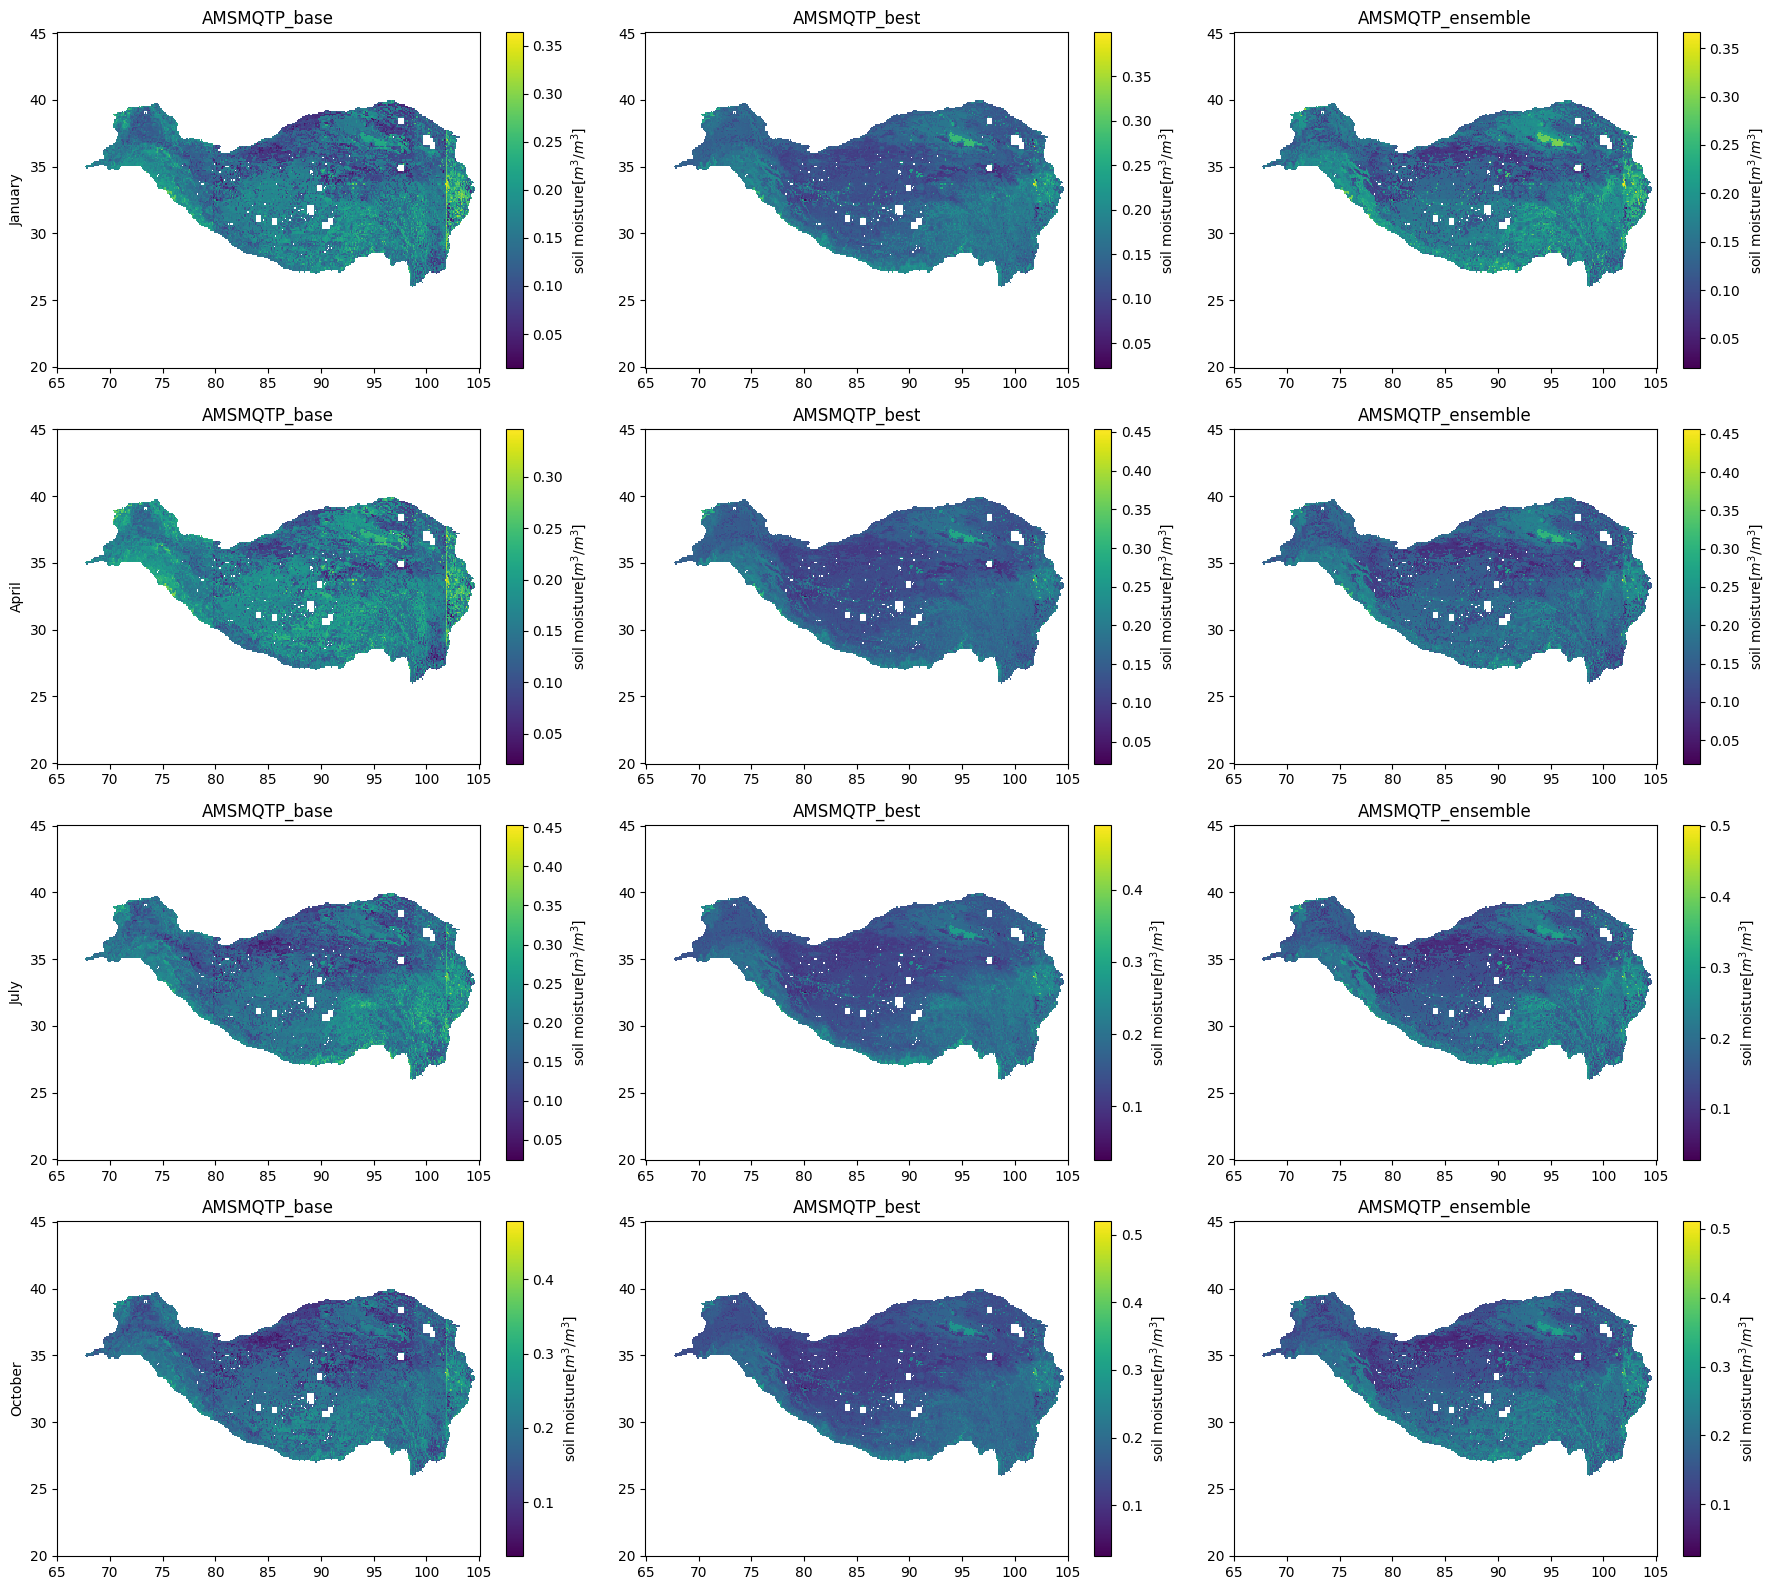

In [3]:
# 1, 4, 7, 10
import os

months = ["01", "04", "07", "10"]

# discussion
save_root = "../../data/plot/discussion_compare/month"
os.makedirs(save_root, exist_ok=True)

month_map = {
    "01": "January", 
    "04": "April", 
    "07": "July", 
    "10": "October" 
}

for l in range(1, 6):
    # discussion
    num_cols = 3
    fig, axes = plt.subplots(nrows=len(months), ncols=num_cols, figsize=(num_cols * 6, len(months) * 4))
    for i, (month, ax) in enumerate(zip(months, axes)):
        # discussion
        ds_base = xr.open_dataset(f"../../data/compare/monthly/pred/layer{l}/{month}.nc")
        ds_best = xr.open_dataset(f"../../data/compare/monthly/discussion_best/layer{l}/{month}.nc")
        ds_ensemble = xr.open_dataset(f"../../data/compare/monthly/discussion_ensemble/layer{l}/{month}.nc")

        ds_base = ds_base.rename({"sm": "sm_base"})
        ds_best = ds_best.rename({"sm": "sm_best"})
        ds_ensemble = ds_ensemble.rename({"sm": "sm_ensemble"})

        ds = xr.merge([ds_base, ds_best, ds_ensemble, ds_mask_interp])

        (ds["sm_base"] * ds["Band1"]).plot.pcolormesh(ax=ax[0], cbar_kwargs={"label": "soil moisture[$m^3/m^3$]"})
        (ds["sm_best"] * ds["Band1"]).plot.pcolormesh(ax=ax[1], cbar_kwargs={"label": "soil moisture[$m^3/m^3$]"})
        (ds["sm_ensemble"] * ds["Band1"]).plot.pcolormesh(ax=ax[2], cbar_kwargs={"label": "soil moisture[$m^3/m^3$]"})

        ax[0].set_title("AMSMQTP_base")
        ax[1].set_title("AMSMQTP_best")
        ax[2].set_title("AMSMQTP_ensemble")
        
        for ax_item in ax:
            ax_item.set_xlabel("")
            ax_item.set_ylabel("")

        ax[0].set_ylabel(month_map[month])

    plt.tight_layout()

    # plt.savefig(os.path.join(save_root, f"layer{l}.pdf"))

    plt.savefig(os.path.join(save_root, f"layer{l}.png"), dpi=300)


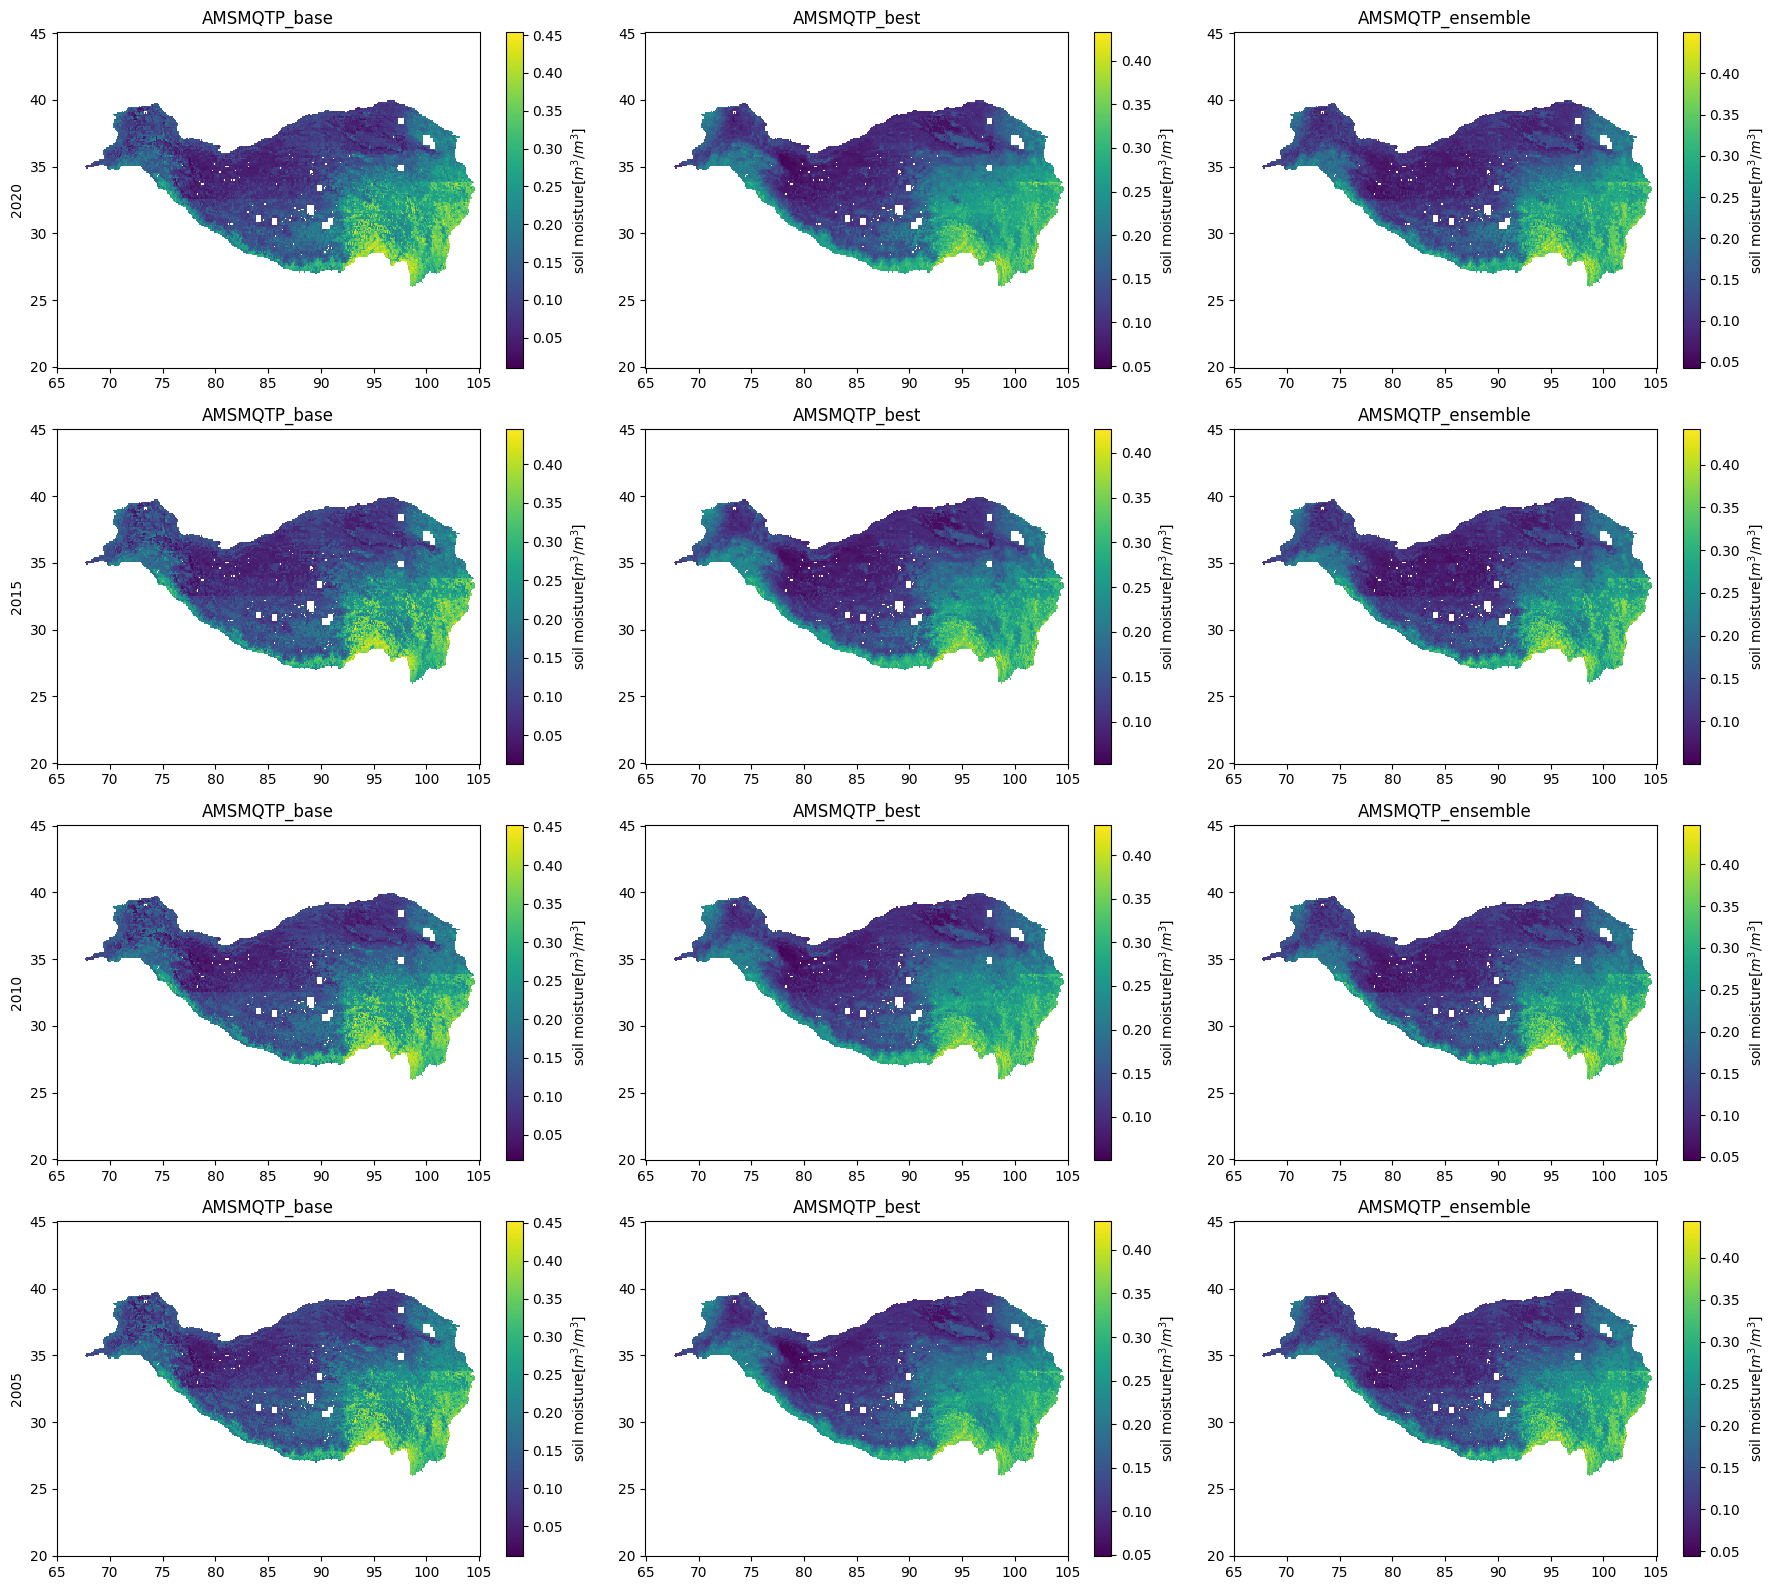

In [4]:
# 2020, 2015, 2010, 2005
import os

years = [2020, 2015, 2010, 2005]

# discussion
save_root = "../../data/plot/discussion_compare/year"
os.makedirs(save_root, exist_ok=True)

for l in range(1, 6):
    # discussion
    num_cols = 3
    fig, axes = plt.subplots(nrows=len(years), ncols=num_cols, figsize=(num_cols * 6, len(years) * 4))
    for i, (year, ax) in enumerate(zip(years, axes)):
        ds_base = xr.open_dataset(f"../../data/compare/yearly/pred/layer{l}/{year}.nc")
        ds_best = xr.open_dataset(f"../../data/compare/yearly/discussion_best/layer{l}/{year}.nc")
        ds_ensemble = xr.open_dataset(f"../../data/compare/yearly/discussion_ensemble/layer{l}/{year}.nc")

        ds_base = ds_base.rename({"sm": "sm_base"})
        ds_best = ds_best.rename({"sm": "sm_best"})
        ds_ensemble = ds_ensemble.rename({"sm": "sm_ensemble"})

        ds = xr.merge([ds_base, ds_best, ds_ensemble, ds_mask_interp])

        (ds["sm_base"] * ds["Band1"]).plot.pcolormesh(ax=ax[0], cbar_kwargs={"label": "soil moisture[$m^3/m^3$]"})
        (ds["sm_best"] * ds["Band1"]).plot.pcolormesh(ax=ax[1], cbar_kwargs={"label": "soil moisture[$m^3/m^3$]"})
        (ds["sm_ensemble"] * ds["Band1"]).plot.pcolormesh(ax=ax[2], cbar_kwargs={"label": "soil moisture[$m^3/m^3$]"})

        ax[0].set_title("AMSMQTP_base")
        ax[1].set_title("AMSMQTP_best")
        ax[2].set_title("AMSMQTP_ensemble")

        for ax_item in ax:
            ax_item.set_xlabel("")
            ax_item.set_ylabel("")

        ax[0].set_ylabel(str(year))

    plt.tight_layout()

    # plt.savefig(os.path.join(save_root, f"layer{l}.pdf"))
    plt.savefig(os.path.join(save_root, f"layer{l}.png"), dpi=300)
